In [2]:
%run ./Definitions.ipynb

2020-01-03 20:36:30.791890
thunder  Fri Jan  3 20:36:31 2020
[0] GeForce GTX 1080 Ti | 59'C,  38 % | 10936 / 11178 MB | david(10926M)
[1] GeForce GTX 1080 Ti | 54'C,   0 % | 10936 / 11178 MB | david(10926M)
[2] GeForce GTX 1080 Ti | 29'C,   0 % |    10 / 11178 MB |
[3] GeForce GTX 1080 Ti | 66'C,  82 % | 10936 / 11178 MB | david(10926M)
[4] GeForce GTX 1080 Ti | 56'C, 100 % | 10936 / 11178 MB | david(10926M)
[5] GeForce GTX 1080 Ti | 28'C,   0 % |    10 / 11178 MB |
[6] GeForce GTX 1080 Ti | 31'C,   0 % |    10 / 11178 MB |
[7] GeForce GTX 1080 Ti | 29'C,   0 % |    10 / 11178 MB |


/ds/environments/python2020/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.
/ds/environments/python2020/lib/python3.7/site-packages/keras/callbacks/callbacks.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Dataset consist of 85730 patients data with 6251 features for each patient
Function definitions executed
Definitions DONE !!



In [3]:
!nvidia-smi
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # so the IDs match nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"] = "7"   # choose here your GPU (0-7)

import tensorflow as tf
import tensorflow.compat.v1 as tf
import keras
# from keras import backend as K
import tensorflow.python.keras.backend as K


Fri Jan  3 20:37:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 44%   57C    P2   105W / 250W |  10936MiB / 11178MiB |     81%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 40%   55C    P2    97W / 250W |  10936MiB / 11178MiB |     84%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [4]:
img_size = 250
red_size = 224

srcpath = '/ds2/data/retina/UK_BB/UK_BB_DATA/fundus/'
funduspath_CR = DATA_dir + 'Fundus_images_250_CR/'
trainpath = funduspath_CR + 'train/'
valpath = funduspath_CR + 'val/'
testpath = funduspath_CR + 'test/'

# SAVED

### Loading Train - Validation - Test Data

In [ ]:
# fundus_train = pd.read_pickle(tts_path + 'fundus_train.pkl')
# fundus_test = pd.read_pickle(tts_path+"fundus_test.pkl")
# fundus_val = pd.read_pickle(tts_path+"fundus_val.pkl")

# fundus_train.shape, fundus_val.shape, fundus_test.shape

In [ ]:
# fundus_train.head()

#### converting the class values to string

In [ ]:
# fundus_train[fundus_train.columns[:]] = fundus_train[fundus_train.columns[:]].astype(str)
# fundus_val[fundus_val.columns[:]] = fundus_val[fundus_val.columns[:]].astype(str)
# fundus_test[fundus_test.columns[:]] = fundus_test[fundus_test.columns[:]].astype(str)

### Converting Left and right to a single dataframe of image names and ground truths by concatenating left and right

In [ ]:
# new_cols = ['Fundus_Filenames','GT523', 'GT19', 'GTi', 'GTu']

# train_left = pd.DataFrame(fundus_train[fundus_train.columns[:5]])
# train_right = pd.DataFrame(fundus_train[fundus_train.columns[5:]])
# traindf_names = pd.DataFrame( np.concatenate( (train_left.values, train_right.values), axis=0 ) )
# traindf_names.columns = new_cols

# val_left = pd.DataFrame(fundus_val[fundus_val.columns[:5]])
# val_right = pd.DataFrame(fundus_val[fundus_val.columns[5:]])
# valdf_names = pd.DataFrame( np.concatenate( (val_left.values, val_right.values), axis=0 ) )
# valdf_names.columns = new_cols

# test_left = pd.DataFrame(fundus_test[fundus_test.columns[:5]])
# test_right = pd.DataFrame(fundus_test[fundus_test.columns[5:]])
# testdf_names = pd.DataFrame( np.concatenate( (test_left.values, test_right.values), axis=0 ) )
# testdf_names.columns = new_cols

In [ ]:
# for i in range(len(traindf_names)):
#     for c in range(4):
#         if(traindf_names[traindf_names.columns[c+1]].iloc[i] != '1'):
#             traindf_names[traindf_names.columns[c+1]].iloc[i] = '0'

# for i in range(len(valdf_names)):
#     for c in range(4):
#         if(valdf_names[valdf_names.columns[c+1]].iloc[i] != '1'):
#             valdf_names[valdf_names.columns[c+1]].iloc[i] = '0'
            
#     update_progress(i/len(valdf_names))

# for i in range(len(testdf_names)):
#     for c in range(4):
#         if(testdf_names[testdf_names.columns[c+1]].iloc[i] != '1'):
#             testdf_names[testdf_names.columns[c+1]].iloc[i] = '0'
#     update_progress(i/len(testdf_names))  

#### Save new train test validation - DONE

In [ ]:
# #SAVE - DONE
# traindf_names.to_pickle(funduspath_CR + 'traindf_names.pkl')
# valdf_names.to_pickle(funduspath_CR + 'valdf_names.pkl')
# testdf_names.to_pickle(funduspath_CR + 'testdf_names.pkl')

#### LOAD new train test validation

In [5]:
traindf_names = pd.read_pickle(funduspath_CR + 'traindf_names.pkl')
valdf_names = pd.read_pickle(funduspath_CR + 'valdf_names.pkl')
testdf_names = pd.read_pickle(funduspath_CR + 'testdf_names.pkl')

traindf_names.shape, valdf_names.shape , testdf_names.shape

((102876, 5), (34292, 5), (34292, 5))

#### Check for images that are available, discard the rest

In [ ]:
# train_names = traindf_names.values
# val_names = valdf_names.values
# test_names = testdf_names.values

# new_train_names = []
# new_val_names = []
# new_test_names = []

# for i in range(len(train_names)):
#     if (os.path.isfile(trainpath+train_names[i][0])):
#         new_train_names.append(train_names[i])
        
# for i in range(len(val_names)):
#     if (os.path.isfile(valpath+val_names[i][0])):
#         new_val_names.append(val_names[i])
        
# for i in range(len(test_names)):
#     if (os.path.isfile(testpath+test_names[i][0])):
#         new_test_names.append(test_names[i])


# new_traindf_names = pd.DataFrame(np.asarray(new_train_names),columns=traindf_names.columns)
# new_valdf_names = pd.DataFrame(np.asarray(new_val_names),columns=valdf_names.columns)
# new_testdf_names = pd.DataFrame(np.asarray(new_test_names),columns=testdf_names.columns)


In [ ]:
# #SAVE - DONE
# new_traindf_names.to_pickle(funduspath_CR + 'valid_traindf_names.pkl')
# new_valdf_names.to_pickle(funduspath_CR + 'valid_valdf_names.pkl')
# new_testdf_names.to_pickle(funduspath_CR + 'valid_testdf_names.pkl')

### LOAD valid train test and validation image names 

In [ ]:
valid_traindf_names = pd.read_pickle(funduspath_CR + 'valid_traindf_names.pkl')
valid_valdf_names = pd.read_pickle(funduspath_CR + 'valid_valdf_names.pkl')
valid_testdf_names = pd.read_pickle(funduspath_CR + 'valid_testdf_names.pkl')

valid_traindf_names.shape , valid_valdf_names.shape , valid_testdf_names.shape

In [ ]:
img_size = 250
red_size = 224

srcpath = '/ds2/data/retina/UK_BB/UK_BB_DATA/fundus/'
funduspath_CR = DATA_dir + 'Fundus_images_250_CR/'
trainpath = funduspath_CR + 'train/'
valpath = funduspath_CR + 'val/'
testpath = funduspath_CR + 'test/'

## Handling Imbalanced Data sets

In [ ]:
which_gt = 3 # CHANGE 1,2,3,4 implies 'GT523', 'GT19', 'GTi', 'GTu'
n_NG = 0 # non glaucoma
n_G = 0  # glaucoma

GT_dict = {1:'GT523',2:'GT19',3:'GTi',4:'GTu'}
Class = GT_dict[which_gt]
temp = valid_traindf_names[Class]
for i in range(len(temp)):
    if(temp[i] == '1'):
        n_G += 1
    else:
        n_NG += 1
        
print("No. of Glaucoma patients in training set:",n_G)
print("No. of non-Glaucoma patients in training set:",n_NG)

### 1. Over Sampling

In [ ]:
# Oversample the minority class

X_train = valid_traindf_names['Fundus_Filenames']
y_train = valid_traindf_names[GT_dict[which_gt]]

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_glaucoma = X[X[Class]=='0']
glaucoma = X[X[Class]=='1']

# upsample minority
glaucoma_upsampled = resample(glaucoma,
                              replace=True, # sample with replacement
                              n_samples=len(not_glaucoma), # match number in majority class
                              random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_glaucoma,glaucoma_upsampled])

# Converting class values to int 1 or 0
upsampled[Class] = upsampled[Class].astype(int)

# shuffle upsampled dataframe for training
upsampled = upsampled.sample(frac=1)


In [ ]:
upsampled[Class].value_counts()

In [ ]:
valid_valdf_names[Class].value_counts()

### 2. Class weights -  for imbalanced dataset
1. https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

2. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / n_NG)*(n_G+n_NG)/2.0 
weight_for_1 = (1 / n_G)*(n_G+n_NG)/2.0 

# class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight = [weight_for_0, weight_for_1]

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))

n_NG , n_G , class_weight

## Define Model and Metrics

In [ ]:
# reg_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6] # 1e-1, 
reg_value = 0.001
METRICS = [keras.metrics.BinaryAccuracy(name='Accuracy'),
           Precision, 
           Recall, 
           F1,
           keras.metrics.AUC(name='AUC')]

# VGG Network - https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

# Weight regularization: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

def make_model():       
    base_model=MobileNet(weights='imagenet',include_top=False) 

    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    #dense layer
    x=Dense(512,activation='relu',kernel_regularizer=l2(reg_value))(x)
    #final layer with sigmoid activation
    x=Dropout(0.5)(x)
    preds=Dense(1,activation='sigmoid')(x)

    model=Model(inputs = base_model.input,
                outputs = preds)

    for layer in model.layers[:86]:
        layer.trainable=False
    for layer in model.layers[86:]:
        layer.trainable=True    

    return model

def mobilenet_model():       
    mobile_conv = MobileNet(weights='imagenet', include_top=False, input_shape=(red_size, red_size, 3))

    # Freeze all the layers
    for layer in mobile_conv.layers:
        layer.trainable = False
        
    # Create the model
    model = models.Sequential()
     # Add the vgg convolutional base model
    model.add(mobile_conv)
 
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu',kernel_regularizer=l2(reg_value)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
 
    return model

def vgg_model():       
    vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(red_size, red_size, 3))

    # Freeze the layers except the last 4 layers
    for layer in vgg_conv.layers[:-4]:
        layer.trainable = False
        
    # Create the model
    model = models.Sequential()
     # Add the vgg convolutional base model
    model.add(vgg_conv)
 
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu',kernel_regularizer=l2(reg_value)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
 
    return model


### Augmentation
https://nbviewer.jupyter.org/github/aleju/imgaug-doc/blob/master/notebooks/A01%20-%20Load%20and%20Augment%20an%20Image.ipynb

In [7]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(scale=1.1),
    iaa.Affine(rotate=(-10, 10)),
    iaa.GammaContrast(0.9),
    iaa.Resize({"height": 230, "width": 230}),
    iaa.CropToFixedSize(width=red_size, height=red_size)
    ])

### Flow from Dataframe
https://www.kaggle.com/dmitrypukhov/cnn-with-imagedatagenerator-flow-from-dataframe

In [ ]:
# To use same settings as mobilenet
# from keras.applications.mobilenet import preprocess_input
# train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen = ImageDataGenerator(preprocessing_function=seq.augment_image, rescale= 1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)  
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_dataframe(
    # dataframe=valid_traindf_names,
    dataframe = upsampled, # upsampled data
    directory=trainpath,
    # x_col=valid_traindf_names.columns[0],
    # y_col=valid_traindf_names.columns[which_gt],
    x_col = upsampled.columns[0], # upsampled data
    y_col = upsampled.columns[1], # upsampled data
    class_mode="raw",
    target_size=(red_size, red_size),
    batch_size=BATCH_SIZE
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_valdf_names,
    directory=valpath,
    x_col=valid_valdf_names.columns[0],
    y_col=valid_valdf_names.columns[which_gt],
    class_mode="raw",
    target_size=(red_size, red_size),
    batch_size=BATCH_SIZE
)


In [ ]:
# which_model = make_model
which_model = mobilenet_model
# which_model = vgg_model
model = which_model()

learning_rate  = 0.001 
decay = 1e-5
opt = Adam(lr=learning_rate,decay=decay) 
model.compile(loss='binary_crossentropy', metrics=METRICS, optimizer=opt)
model.summary()

In [ ]:
# With L2 weight regularizer
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001, verbose=1)
keras_model_path = funduspath_CR + 'Models/'
n_epochs= 5
n_steps_per_epoch = 10
n_validation_steps = 10

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=n_epochs, 
                              steps_per_epoch=n_steps_per_epoch,
                              validation_data=validation_generator,
                              validation_steps=n_validation_steps, 
                              callbacks=[es, reduce_lr]
                             )

In [ ]:
plt.figure(figsize=(10,10))
plot_metrics(history)

### Evaluation

In [ ]:
start = time.time()
results_tr = model.evaluate(train_generator,steps=10)
tr_time = time.time()
results_vl = model.evaluate(validation_generator,steps=10)
vl_time = time.time()

print("Train evaluate time:",(tr_time-start) ,"\nValidation evaluate time:", (vl_time-tr_time))

In [ ]:
print("NAME :\tTRAIN :\tVALIDATION ")
for name, value_tr, value_vl in zip(model.metrics_names, results_tr, results_vl):
    print("%s : %5.3f : %7.3f" %(name, value_tr , value_vl))
#     print("%s : %7.3f" %(name , value_vl))

### Prediction
The output of a binary classification is the probability of a sample belonging to a class.


In [ ]:
# PREDICTED LABELS

start = time.time()
pred_tr = model.predict_generator(train_generator,steps=10)
tr_time = time.time()
pred_vl = model.predict_generator(validation_generator,steps=10)
vl_time = time.time()

print("Train evaluate time:",(tr_time-start) ,"\nValidation evaluate time:", (vl_time-tr_time))

In [ ]:
# TRUE LABELS

train_labels = upsampled[Class].tolist()
train_labels = [int(i) for i in train_labels]

val_labels = valid_valdf_names[Class].tolist()
val_labels = [int(i) for i in val_labels]


### MLFlow 

In [ ]:
mlflow.end_run()
mlflow.start_run()

mlflow.log_param("which_gt", which_gt)
mlflow.log_param("which_model", which_model)
mlflow.log_param("augmentation", seq)
mlflow.log_param("BATCH_SIZE", BATCH_SIZE)
mlflow.log_param("epochs", n_epochs)
mlflow.log_param("steps_per_epoch", n_steps_per_epoch)
mlflow.log_param("validation_steps", n_validation_steps)
mlflow.log_param("reg_value", reg_value)
mlflow.log_param("learning_rate", learning_rate)
mlflow.log_param("learning_rate", learning_rate)
mlflow.log_param("decay", decay)
mlflow.log_param("optimizer", opt)

for i in history.history.keys():
    for j in range(len(history.history[i])):
        mlflow.log_metric(i, history.history[i][j], step=j)

mlflow.log_metric("train evaluation",results_tr)
mlflow.log_metric("validation evaluation",results_vl)
mlflow.log_metric("train prediction",pred_tr)
mlflow.log_metric("validation prediction",pred_vl)

mlflow.end_run()

### ROC Curve

In [ ]:
plt.figure(figsize=(10,10))
plot_roc("Train", train_labels, pred_tr, color=colors[0])
plot_roc("Validation", val_labels, pred_vl, color=colors[1],linestyle='--')
plt.legend(loc='lower right')

### Confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(val_labels, pred_vl > 0.5).ravel()
print("Validation data: \nTN:",tn,"\nFP:",fp,"\nFN:",fn,"\nTP:",tp)


In [ ]:
plot_cm(val_labels, pred_vl)

In [ ]:
# https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

In [ ]:
# Links to check for further experimentation:
# https://machinelearningmastery.com/improve-deep-learning-performance/


In [32]:
image[800][800]

Array([215,  90,  38], dtype=uint8)

In [45]:
rescale = 1./128

In [46]:
arr = np.asarray([0, 255, 128, 200])
arr

array([  0, 255, 128, 200])

In [48]:
(arr * rescale)-1

array([-1.       ,  0.9921875,  0.       ,  0.5625   ])

# ORIGINAL

Original:


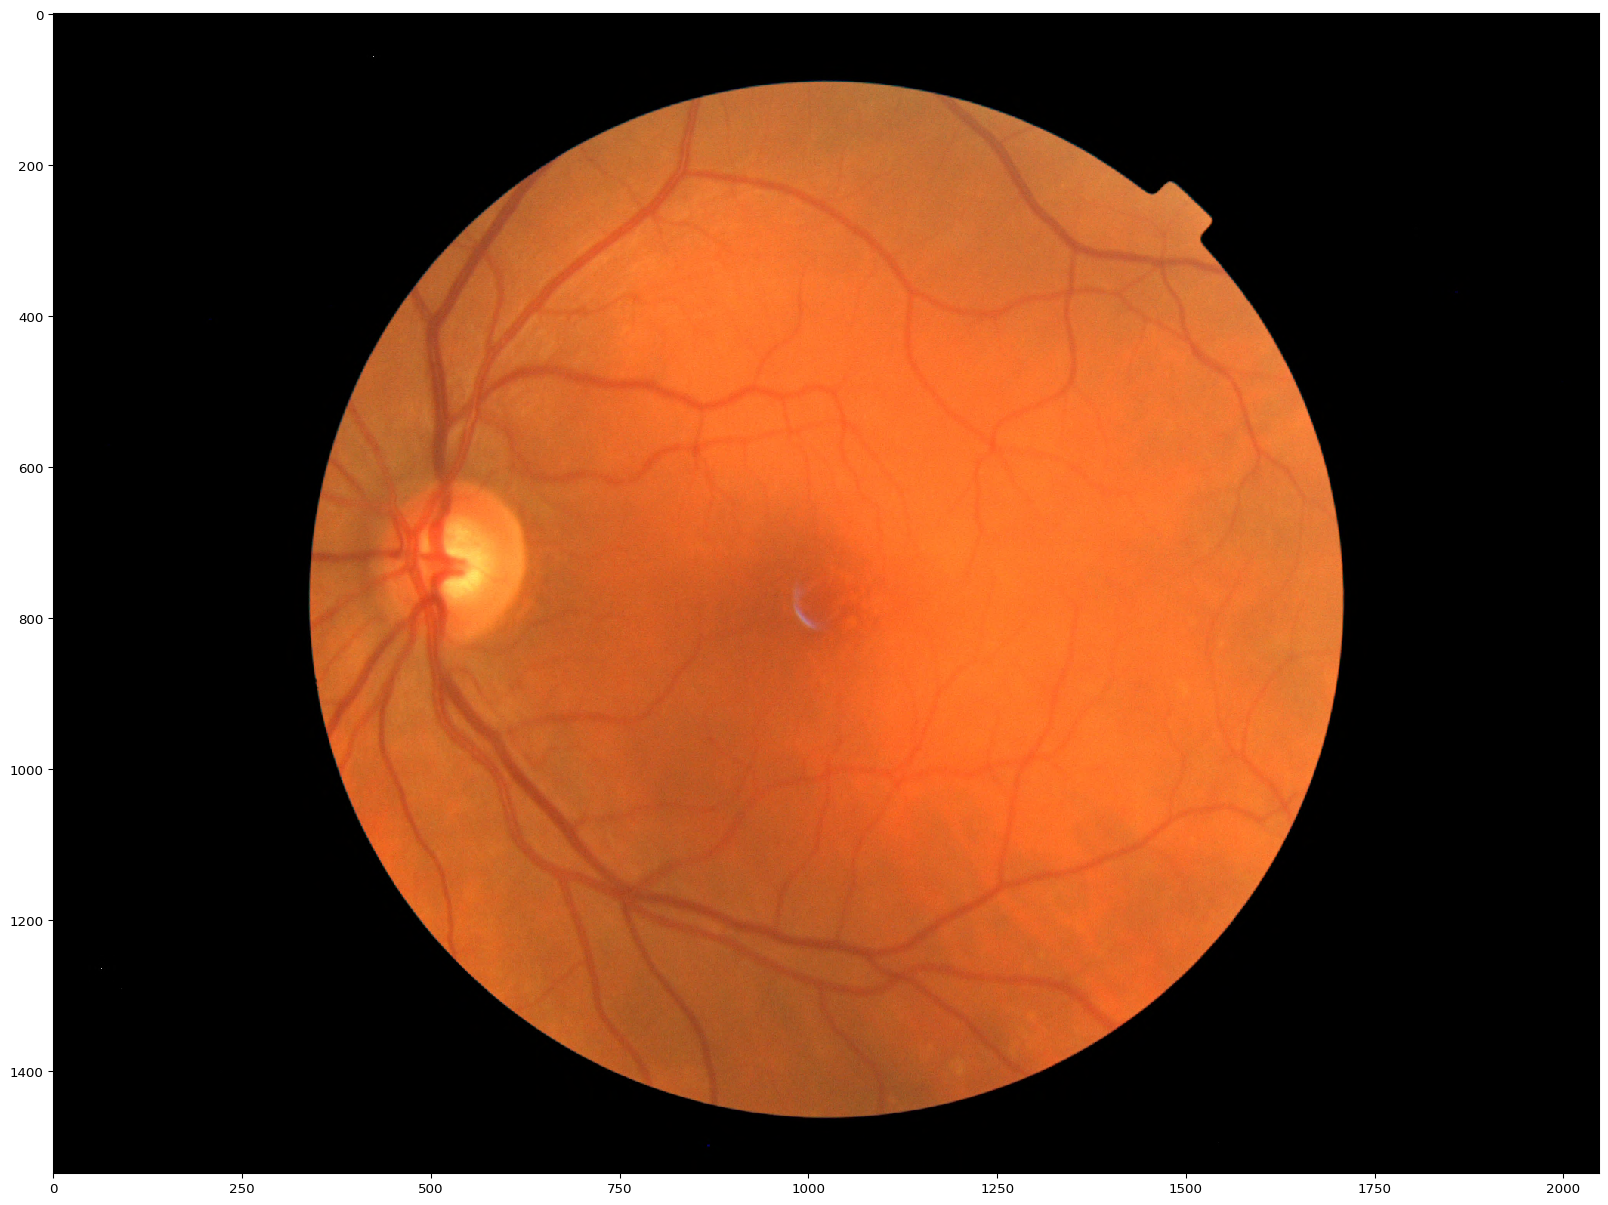

In [17]:
image = imageio.imread(srcpath+'4568884_21015_0_0.png')
if(image.shape==2):
    image = np.repeat(image[:, :, np.newaxis], 3, axis=2) 
# image = np.uint8(np.empty((img_size,img_size,3)))
print("Original:")
ia.imshow(image)

# CROPPED

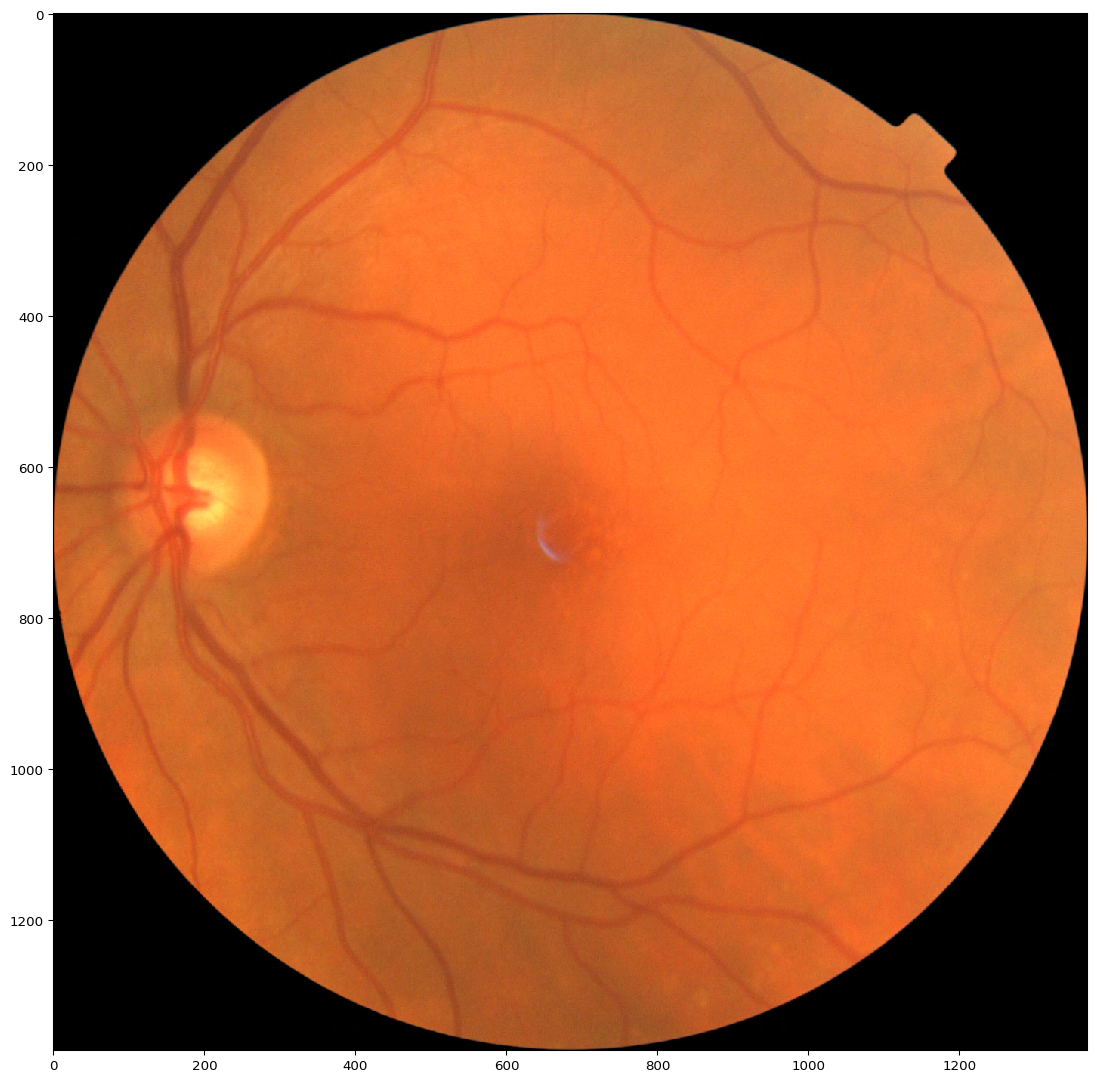

In [7]:
ROI = get_ROI(image)
ia.imshow(ROI)

# RESIZED

Resized:


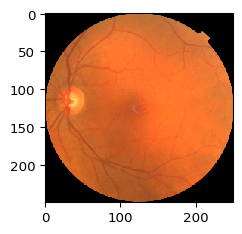

In [8]:
imResize = cv2.resize(ROI, dsize=(250, 250))
print("Resized:")
ia.imshow(imResize)

# AUGMENTED

Augmented:


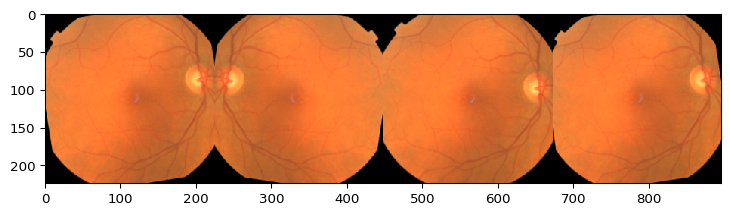

In [8]:
images = [imResize, imResize, imResize, imResize]
images_aug = seq.augment_images(images)
print("Augmented:")
ia.imshow(np.hstack(images_aug))